In [352]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [353]:
ls

 Volume in drive C is OS
 Volume Serial Number is A09C-8A30

 Directory of C:\Users\Ahmed-Basem\Desktop\Current\Corelia\Task 2

05/05/2023  03:29 PM    <DIR>          .
05/05/2023  03:29 PM    <DIR>          ..
05/03/2023  05:26 PM    <DIR>          .ipynb_checkpoints
03/01/2021  06:50 AM           530,389 Data_Train.xlsx
05/05/2023  03:29 PM           100,002 Regression.ipynb
02/15/2020  09:10 AM           120,774 Test_set.xlsx
               3 File(s)        751,165 bytes
               3 Dir(s)  24,157,540,352 bytes free


In [354]:
data = pd.read_excel('Data_Train.xlsx')
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


### Get insights about the dataset

In [355]:
print(f"There are {data.shape[0]} Rows and {data.shape[1]} Columns in our dataset")

There are 10683 Rows and 11 Columns in our dataset


In [356]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [357]:
# get the count of null values in every column in our dataset
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [358]:
data = data.dropna()

In [359]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [360]:
def get_insights(column):
    print(f"### Columns in {column} ")
    print("\n### most appeared values ")
    print(data[column].value_counts().index[:5].values)
    print(f"\n### Number of unique values is \n{data[column].nunique()} ")
    print('\n#### Random Values ####')
    print(data.sample(5)[column].values)

In [361]:
get_insights('Airline')

### Columns in Airline 

### most appeared values 
['Jet Airways' 'IndiGo' 'Air India' 'Multiple carriers' 'SpiceJet']

### Number of unique values is 
12 

#### Random Values ####
['Air India' 'Air Asia' 'Air India' 'Multiple carriers' 'Jet Airways']


In [362]:
data.groupby('Airline').mean()

,Price
Airline,
Air Asia,5590.260188
Air India,9612.427756
GoAir,5861.056701
IndiGo,5673.682903
Jet Airways,11643.923357
Jet Airways Business,58358.666667
Multiple carriers,10902.678094
Multiple carriers Premium economy,11418.846154
SpiceJet,4338.284841


In [363]:
get_insights('Date_of_Journey')

### Columns in Date_of_Journey 

### most appeared values 
['18/05/2019' '6/06/2019' '21/05/2019' '9/06/2019' '12/06/2019']

### Number of unique values is 
44 

#### Random Values ####
['18/05/2019' '27/04/2019' '24/06/2019' '21/05/2019' '06/03/2019']


In [364]:
data['day'] = data['Date_of_Journey'].apply(lambda x:int(x.split('/')[0]))
data['month'] = data['Date_of_Journey'].apply(lambda x:int(x.split('/')[1]))
# data['year'] = data['Date_of_Journey'].apply(lambda x:int(x.split('/')[2]))
data = data.drop('Date_of_Journey',axis=1)

In [365]:
data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day,month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [366]:
get_insights('Source')

### Columns in Source 

### most appeared values 
['Delhi' 'Kolkata' 'Banglore' 'Mumbai' 'Chennai']

### Number of unique values is 
5 

#### Random Values ####
['Delhi' 'Mumbai' 'Chennai' 'Kolkata' 'Delhi']


In [367]:
data.groupby('Source').mean()

,Price,day,month
Source,,,
Banglore,8017.464269,12.668639,4.149294
Chennai,4789.892388,13.800525,4.742782
Delhi,10540.113536,14.496914,4.897266
Kolkata,9158.389411,12.662139,4.876001
Mumbai,5059.708752,13.058824,4.535151


In [368]:
get_insights('Destination')

### Columns in Destination 

### most appeared values 
['Cochin' 'Banglore' 'Delhi' 'New Delhi' 'Hyderabad']

### Number of unique values is 
6 

#### Random Values ####
['Cochin' 'New Delhi' 'New Delhi' 'Banglore' 'Cochin']


In [369]:
data.groupby('Destination').mean()

,Price,day,month
Destination,,,
Banglore,9158.389411,12.662139,4.876001
Cochin,10540.113536,14.496914,4.897266
Delhi,5143.918577,13.569960,4.996047
Hyderabad,5059.708752,13.058824,4.535151
Kolkata,4789.892388,13.800525,4.742782
New Delhi,11917.716738,11.445279,3.000000


In [370]:
get_insights('Route')

### Columns in Route 

### most appeared values 
['DEL → BOM → COK' 'BLR → DEL' 'CCU → BOM → BLR' 'CCU → BLR' 'BOM → HYD']

### Number of unique values is 
128 

#### Random Values ####
['DEL → BOM → COK' 'BLR → DEL' 'DEL → BHO → BOM → COK' 'BLR → DEL'
 'CCU → BOM → BLR']


In [371]:
data['Route'].unique()

array(['BLR → DEL', 'CCU → IXR → BBI → BLR', 'DEL → LKO → BOM → COK',
       'CCU → NAG → BLR', 'BLR → NAG → DEL', 'CCU → BLR',
       'BLR → BOM → DEL', 'DEL → BOM → COK', 'DEL → BLR → COK',
       'MAA → CCU', 'CCU → BOM → BLR', 'DEL → AMD → BOM → COK',
       'DEL → PNQ → COK', 'DEL → CCU → BOM → COK', 'BLR → COK → DEL',
       'DEL → IDR → BOM → COK', 'DEL → LKO → COK',
       'CCU → GAU → DEL → BLR', 'DEL → NAG → BOM → COK',
       'CCU → MAA → BLR', 'DEL → HYD → COK', 'CCU → HYD → BLR',
       'DEL → COK', 'CCU → DEL → BLR', 'BLR → BOM → AMD → DEL',
       'BOM → DEL → HYD', 'DEL → MAA → COK', 'BOM → HYD',
       'DEL → BHO → BOM → COK', 'DEL → JAI → BOM → COK',
       'DEL → ATQ → BOM → COK', 'DEL → JDH → BOM → COK',
       'CCU → BBI → BOM → BLR', 'BLR → MAA → DEL',
       'DEL → GOI → BOM → COK', 'DEL → BDQ → BOM → COK',
       'CCU → JAI → BOM → BLR', 'CCU → BBI → BLR', 'BLR → HYD → DEL',
       'DEL → TRV → COK', 'CCU → IXR → DEL → BLR',
       'DEL → IXU → BOM → COK', 'CCU 

In [372]:
def route_len(route):
    try:
        route = len(route.split('→'))
        return route
    except:
        print(route)
        return 0

In [373]:
# data['route_len'] = data['Route'].apply(route_len)

In [374]:
data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day,month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [375]:
data = data.drop(['Dep_Time','Arrival_Time','Route'],axis=1)

In [376]:
get_insights('Duration')

### Columns in Duration 

### most appeared values 
['2h 50m' '1h 30m' '2h 45m' '2h 55m' '2h 35m']

### Number of unique values is 
368 

#### Random Values ####
['7h 15m' '2h 30m' '26h' '22h 10m' '21h 35m']


In [377]:
def convert_time_minute(time):
    if "m" in time:
        time = time.replace('m',"")
        if "h" not in time:
            hours = 0
            mintues = time.split(" ")[0]
        else:
            time = time.replace('h',"")
            hours = time.split(" ")[0]
            mintues = time.split(" ")[1]
        total = int(hours) * 60 + int(mintues)
    else:
        time = time.replace('h',"")
        total = int(time) * 60

    
    
    return total

In [378]:
data['Duration'] = data['Duration'].apply(convert_time_minute)

In [379]:
data.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,day,month
0,IndiGo,Banglore,New Delhi,170,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,445,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,1140,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,325,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,285,1 stop,No info,13302,1,3


In [380]:
get_insights('Total_Stops')

### Columns in Total_Stops 

### most appeared values 
['1 stop' 'non-stop' '2 stops' '3 stops' '4 stops']

### Number of unique values is 
5 

#### Random Values ####
['non-stop' 'non-stop' '1 stop' '1 stop' 'non-stop']


In [381]:
def convert_stops_int(stops):
    if "1" in stops:
        return  1
    elif "2" in stops:
        return 2
    elif "3" in stops:
        return 3
    elif "4" in stops:
        return 4
    else:
        return 0

In [382]:
data['Total_Stops'] = data['Total_Stops'].apply(convert_stops_int)

In [383]:
data.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,day,month
0,IndiGo,Banglore,New Delhi,170,0,No info,3897,24,3
1,Air India,Kolkata,Banglore,445,2,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,1140,2,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,325,1,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,285,1,No info,13302,1,3


In [384]:
get_insights('Additional_Info')

### Columns in Additional_Info 

### most appeared values 
['No info' 'In-flight meal not included' 'No check-in baggage included'
 '1 Long layover' 'Change airports']

### Number of unique values is 
10 

#### Random Values ####
['No info' 'No info' 'No info' 'No info' 'In-flight meal not included']


In [385]:
data['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [386]:
data.groupby('Additional_Info').mean()['Price']

Additional_Info
1 Long layover                  22109.631579
1 Short layover                 26743.000000
2 Long layover                  26480.000000
Business class                  56811.250000
Change airports                 16800.714286
In-flight meal not included      9471.834511
No Info                          8044.666667
No check-in baggage included     3645.156250
No info                          9141.519295
Red-eye flight                  10873.000000
Name: Price, dtype: float64

In [387]:
data['Additional_Info'].dtype

dtype('O')

In [388]:
X = data.drop('Price',axis=1)
Y = data['Price'].values

In [389]:
numerical = [col for col in X.columns if data[col].dtype != "O"]
numerical

['Duration', 'Total_Stops', 'day', 'month']

In [390]:
categorical = [col for col in X.columns if data[col].dtype == "O"]
categorical

['Airline', 'Source', 'Destination', 'Additional_Info']

In [391]:
for col in categorical:
    print(col + " has : " + str(X[col].nunique()))

Airline has : 12
Source has : 5
Destination has : 6
Additional_Info has : 10


In [392]:
X.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,day,month
0,IndiGo,Banglore,New Delhi,170,0,No info,24,3
1,Air India,Kolkata,Banglore,445,2,No info,1,5
2,Jet Airways,Delhi,Cochin,1140,2,No info,9,6
3,IndiGo,Kolkata,Banglore,325,1,No info,12,5
4,IndiGo,Banglore,New Delhi,285,1,No info,1,3


In [393]:
transform_pipeline = ColumnTransformer([
    ('num',StandardScaler(),numerical),
    ('category',OneHotEncoder(),categorical)
])

In [394]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=.15,random_state =42)

In [395]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((9079, 8), (1603, 8), (9079,), (1603,))

In [396]:
x_train = transform_pipeline.fit_transform(x_train).toarray()
x_train.shape

(9079, 37)

In [397]:
class LinearRegression():
    
    def __init__(self,lr,iterations):
        
        self.lr = lr
        self.iterations = iterations
        self.history = {"epoch":[],"loss":[]}
    def fit(self,x,y):
        n_samples , n_features = x.shape
        
        self.weights = np.random.randn(n_features)
        self.bais = 0
        
        for i in range(self.iterations):
            y_pred = np.dot(x,self.weights) + self.bais
            
            error = y_pred - y

            dW = (1 / n_samples) * np.dot(x.T,error)
            db = (1 / n_samples) * np.sum(error)

            self.weights = self.weights - self.lr * dW
            self.bais = self.bais - self.lr * db
            
            cost = self.score(x,y)
            self.history['epoch'].append(i+1)
            self.history['loss'].append(cost)
            
    def predict(self,x):
        
        net = np.dot(x,self.weights) + self.bais
        return net
     
    def score(self,x,y_true):
        y_pred = self.predict(x)
        
        error = (y_pred - y_true)**2
        mse = np.mean(error)
        rmse = np.sqrt(mse)

        return rmse
    
    def r2_score(self, x, y_true):
        
        y_pred = self.predict(x)
        sum_squared_regression = np.sum((y_true - y_pred)**2)
        total_sum_squares = np.sum((y_true - np.mean(y_true)) ** 2)
        
        r2 = 1 - (sum_squared_regression / total_sum_squares)
        return r2

In [398]:
lr = LinearRegression(.01,300)
lr.fit(x_train,y_train)

In [405]:
print(f'Model Accuracy on Training Data : {round(lr.r2_score(x_train,y_train) * 100)}')

Model Accuracy on Training Data 54


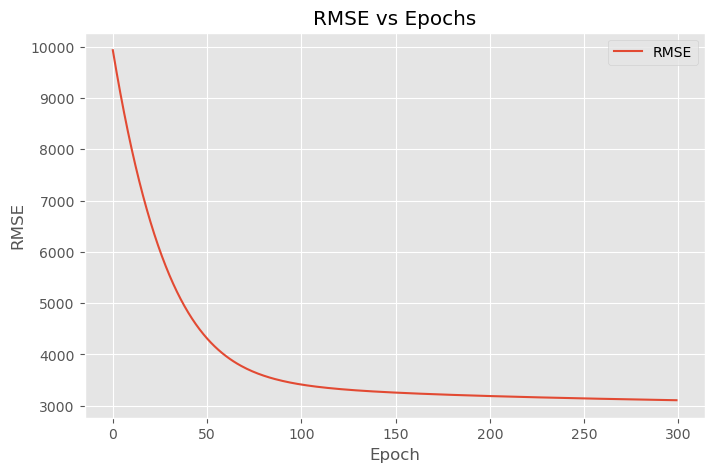

In [400]:
plt.figure(figsize=(8,5))
plt.plot(history['loss'],label='RMSE')
plt.title('RMSE vs Epochs')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.legend()
plt.show()

In [401]:
x_test = transform_pipeline.transform(x_test).toarray()

In [402]:
print(f'RMSE Score in Test Data {lr.score(x_test,y_test)}')

RMSE Score in Test Data 3329.6705390183206


In [406]:
print(f'Model Accuracy on Test Data {round(lr.r2_score(x_test,y_test) * 100)}')

Model Accuracy on Test Data 52
